# Analysis and Prediction of Malaysia Population from Demographic data (2010-2019)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# To remove warning sign
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_excel(r'C:\Users\ASUS\OneDrive - sjvschoolo.sjvschoolo\Documents\Anaconda\#3\Population_by_age_group_sex_and_ethnic_group_2010-2019e_Malaysia.xlsx')

In [4]:
df.head()

,Sex,Age Group,Year,Citizen category,Ethnic,"Population (""000)"
0,Male,0-04,2010,Malaysian citizens,Bumiputera,942.030
1,Male,0-04,2010,Malaysian citizens,Chinese,223.155
2,Male,0-04,2010,Malaysian citizens,Indians,76.216
3,Male,0-04,2010,Malaysian citizens,Others,18.894
4,Male,0-04,2010,Non-Malaysian citizens,NaN,27.892


Acrtual data retrieved from https://www.dosm.gov.my/v1/index.php?r=column3/accordion&menu_id=amZNeW9vTXRydTFwTXAxSmdDL1J4dz09

In [5]:
df.rename(columns = {'Population ("000)':'Population (000)'}, inplace = True)
df.head()

,Sex,Age Group,Year,Citizen category,Ethnic,Population (000)
0,Male,0-04,2010,Malaysian citizens,Bumiputera,942.030
1,Male,0-04,2010,Malaysian citizens,Chinese,223.155
2,Male,0-04,2010,Malaysian citizens,Indians,76.216
3,Male,0-04,2010,Malaysian citizens,Others,18.894
4,Male,0-04,2010,Non-Malaysian citizens,NaN,27.892


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               1700 non-null   object 
 1   Age Group         1700 non-null   object 
 2   Year              1700 non-null   object 
 3   Citizen category  1700 non-null   object 
 4   Ethnic            1360 non-null   object 
 5   Population (000)  1700 non-null   float64
dtypes: float64(1), object(5)
memory usage: 79.8+ KB


In [7]:
df.describe()

,Population (000)
count,1700.000000
mean,181.110963
std,252.204346
min,0.595000
25%,14.675000
50%,77.800000
75%,232.925000
max,1023.700000


# Q1 = What is the total Population in Malaysia based on Gender ?

In [8]:
df_sex = df.groupby(['Sex']).sum()
df_sex

,Population (000)
Sex,
Female,148936.595
Male,158952.042


<AxesSubplot:title={'center':'Population based on Gender from 2010-2019'}, xlabel='Gender', ylabel='Population'>

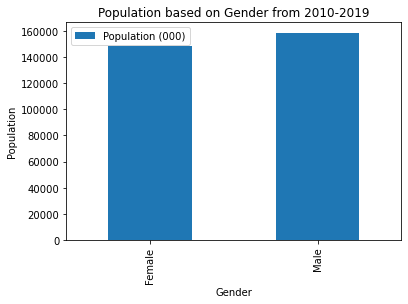

In [9]:
df_sex.plot(kind='bar', xlabel='Gender', ylabel='Population', title='Population based on Gender from 2010-2019')

# Q2: I want to know how many population per year based on gender

In [10]:
df_pivot_year = df.pivot_table(index='Year', 
                          columns='Sex', 
                          values=['Population (000)'], 
                          aggfunc='sum')
df_pivot_year.head()

Population (000)           
Sex            Female       Male
Year                            
2010        13858.095  14730.542
2011        14081.700  14980.200
2012        14294.400  15214.900
2013        14608.900  15605.100
2014        14840.600  15867.800

<AxesSubplot:title={'center':'Population in Malaysia from 2010-2019'}, xlabel='Year', ylabel='Population (000)'>

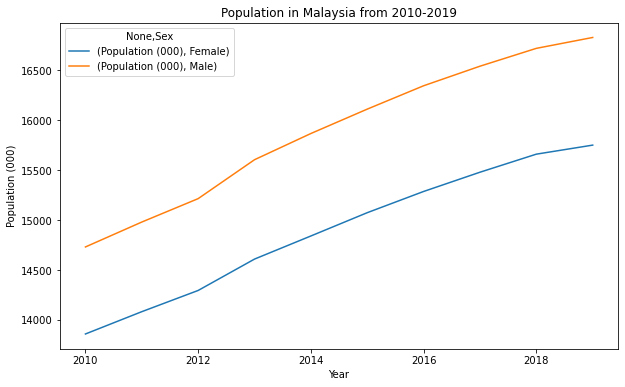

In [11]:
df_pivot_year.plot(kind='line', xlabel='Year', ylabel='Population (000)', title='Population in Malaysia from 2010-2019',
             figsize=(10,6))

# Q3: I want to know the age group of the total population in Malaysia

In [12]:
df_pivot_age_group = df.pivot_table(index='Age Group', 
                          columns='Sex', values='Population (000)', 
                          aggfunc='sum')
df_pivot_age_group.head()

Sex,Female,Male
Age Group,,
0-04,12426.707,13241.787
05-09,12424.244,13175.236
10-14,12780.638,13467.352
15-19,13824.914,14757.862
20-24,14947.565,16418.892


In [22]:
df_pivot_age_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0-04 to 80+
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Female  17 non-null     float64
 1   Male    17 non-null     float64
dtypes: float64(2)
memory usage: 408.0+ bytes


In [23]:
df_pivot_age_group.index

Index(['0-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80+'],
      dtype='object', name='Age Group')

In [24]:
df_pivot_age_group.columns

Index(['Female', 'Male'], dtype='object', name='Sex')

<AxesSubplot:title={'center':'Population in Malaysia from 2010-2019'}, xlabel='Age Group', ylabel='Population (000)'>

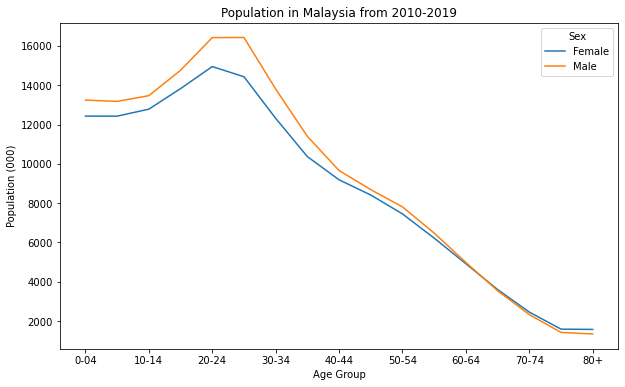

In [17]:
df_pivot_age_group.plot(kind='line', xlabel='Age Group', ylabel='Population (000)', title='Population in Malaysia from 2010-2019',
             figsize=(10,6))


# Q4: I want to know the Major Ethnicity of the total population in Malaysia

In [14]:
df_pivot_ethnic = df.pivot_table(index='Ethnic', 
                          columns='Sex', values='Population (000)', 
                          aggfunc='sum')
df_pivot_ethnic

Sex,Female,Male
Ethnic,,
Bumiputera,94315.972,95882.227
Chinese,32004.744,33856.045
Indians,9897.893,9863.206
Others,1306.250,1373.360


<AxesSubplot:xlabel='Ethnic'>

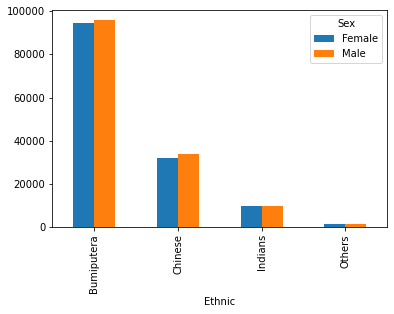

In [15]:
df_pivot_ethnic.plot(kind='bar')

# I wanna try predict growth population in Malaysia based on linear regression....

### Import data first

In [16]:
df_predict = pd.read_excel(r'C:\Users\ASUS\OneDrive - sjvschoolo.sjvschoolo\Documents\Anaconda\#3\Population_by_age_group_sex_and_ethnic_group_2010-2019e_Malaysia (1).xlsx')

In [17]:
df_predict.head()

,Year,Population (000)
0,2010,942.030
1,2010,223.155
2,2010,76.216
3,2010,18.894
4,2010,27.892


### Sum up all the populations data by year

In [18]:
df_predict = df_predict.groupby('Year').sum()
df_predict

,Population (000)
Year,
2010,28588.637
2011,29061.900
2012,29509.300
2013,30214.000
2014,30708.400
2015,31186.400
2016,31633.300
2017,32022.400
2018,32382.300


### Make new data frame set

In [19]:
df_predict = df_predict['Population (000)'].to_frame(name = 'Population').reset_index()

In [20]:
df_predict

,Year,Population
0,2010,28588.637
1,2011,29061.900
2,2012,29509.300
3,2013,30214.000
4,2014,30708.400
5,2015,31186.400
6,2016,31633.300
7,2017,32022.400
8,2018,32382.300
9,2019,32582.000


### Use sk-learn method (Linear Regression Algorithm Method)

In [21]:
# make list out of the dataframe set

year_list = df_predict['Year'].tolist()
population_list = df_predict['Population'].tolist()

In [22]:
# create numpy array for year(target) column and population column(feature)

xs = np.array(year_list, dtype=np.float64)
ys = np.array(population_list, dtype=np.float64)

In [23]:
# 1D array created
xs.shape, ys.shape

((10,), (10,))

In [24]:
xs = xs.reshape((-1,1))

In [25]:
import seaborn as sns
from matplotlib import style
# from statistics import mean
from sklearn import linear_model

# Create linear regression object
population_year = linear_model.LinearRegression()

# Train the model using the training sets
population_year.fit(xs,ys)

# get the regression line using the model
regression_line = population_year.predict(xs)

# Making predictions
predict_year = 2022
predict_population = population_year.predict(np.array([[predict_year]]))[0]
print(predict_population)


34265.43038181821


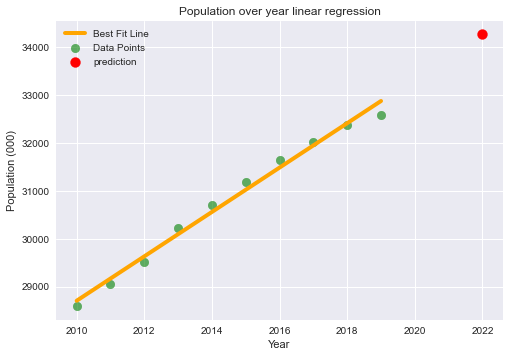

In [26]:
style.use('seaborn')
plt.scatter(xs, ys, label='Data Points', alpha=0.6, color='green', s=75)
plt.scatter(predict_year, predict_population, label='prediction', color='red', s=100)
plt.plot(xs, regression_line, label='Best Fit Line', color='orange', linewidth=4)
plt.title('Population over year linear regression')
plt.xlabel('Year')
plt.ylabel('Population (000)')
plt.legend()
plt.show()

## From the prediction above we can see that total population in Malaysia will be 34, 356, 000 (34.4 million)